## FAKE NEWS CLASSIFICATION USING RANDOM FOREST:


In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
fakedataset = pd.read_csv('C:/ML summer internship/ML/Data/Fake.csv')
fake = fakedataset[:5000]


In [6]:
realdataset = pd.read_csv('C:/ML summer internship/ML/Data/True.csv')
real = realdataset[:5000]


In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
real.loc[:, "class"] = 1
fake.loc[:, "class"] = 0


In [8]:
import warnings
warnings.filterwarnings('ignore')
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]
real.drop(["subject", "date", "title"], axis = 1)
fake.drop(["subject", "date", "title"], axis = 1)

,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
4995,FBI Warns Republicans: Do Not Leak Clinton Em...,0
4996,Justice Department Announces It Will No Longe...,0
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,0
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,0


In [9]:
dataset = real.append(fake, ignore_index = True)

In [10]:
del real, fake

In [11]:
import nltk
nltk.download("stopwords", quiet=True)
nltk.download("punkt",quiet=True)

True

In [14]:
import re
import string
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.PorterStemmer() 

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

dataset['body_len'] = dataset['text'].apply(lambda x: len(x) - x.count(" "))
dataset['punct%'] = dataset['text'].apply(lambda x: count_punct(x))
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [stemmer.stem(word) for word in tokens if word not in stopwords]
    return text


In [15]:
from sklearn.model_selection import train_test_split
X=dataset[['text', 'body_len', 'punct%']]
y=dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])
tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])
X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),
          pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True),
          pd.DataFrame(tfidf_test.toarray())], axis=1)
X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,55054,55055,55056,55057,55058,55059,55060,55061,55062,55063
0,1766,1.8,0.014404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2928,2.7,0.008197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2249,2.0,0.010530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3483,1.9,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,338,2.1,0.028734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns


Precision: 0.999 / Recall: 0.995 / F1-Score: 0.997 / Accuracy: 0.997


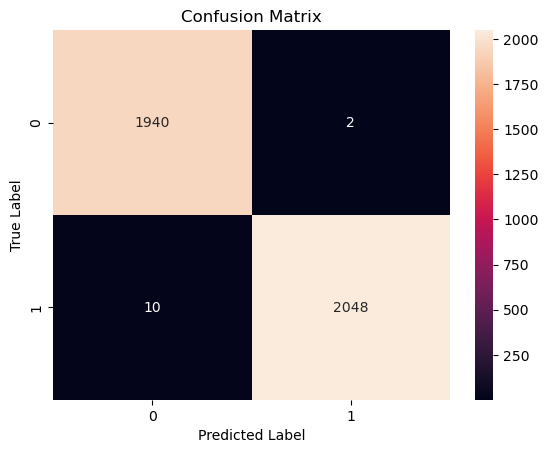

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)
y_pred = y_pred.astype(int)
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)


precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
accuracy = accuracy_score(y_test, y_pred)


print('Precision: {:.3f} / Recall: {:.3f} / F1-Score: {:.3f} / Accuracy: {:.3f}'.format(precision, recall, fscore, accuracy))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### NAME- AMAN KUMAR
#### SIC-22BCSI16